## Mountain Car

In [1]:
from collections import deque
import gym
import numpy as np
import sys
import time

from agents.agent import DDPG

task = gym.make('MountainCarContinuous-v0')
task.reset()
num_episodes = 1000
agent = DDPG(task)

best_score = -np.inf
scores = []

t0 = time.time()
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    for i_step in range(200):
        action = agent.act(state) 
        next_state, reward, done, _ = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        if done:
            break
    best_score = max(best_score, agent.reward)
    scores.append(agent.reward)
    print("\rEpisode = {:4d}, score = {:7.3f}, (best = {:7.3f})".format(
        i_episode, agent.reward, best_score), end="")  # [debug]
    sys.stdout.flush()
t1 = time.time()
print()
print("EPM is {:7.3f}".format(num_episodes * 60 / (t1 - t0)))

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode = 1000, score =  63.157, (best =  86.389)
EPM is  28.334


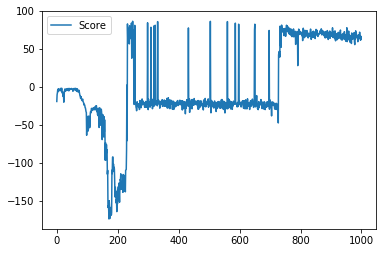

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(range(len(scores))), scores, label='Score')
plt.legend()
_ = plt.ylim()

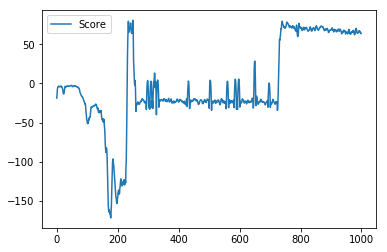

In [15]:
from scipy.signal import savgol_filter

smoothed_scores = savgol_filter(scores, 9, 3)
plt.plot(list(range(len(smoothed_scores))), smoothed_scores, label='Score')
plt.legend()
_ = plt.ylim()